# Chapter 9 線形動的システム

## 9.1 線形動的システム

線形時不変動的システム
$$
x_{t+1} = A x_t, \quad t=1, \ldots, T
$$
をシミュレーションしよう．ここで状態遷移行列は
$$
A = 
\begin{bmatrix}
\phantom{-}0.97 & \phantom{-}0.10 & −0.05 \\
−0.30 & \phantom{-}0.99 & \phantom{-}0.05 \\
\phantom{-}0.01 & −0.04 & \phantom{-}0.96
\end{bmatrix}
$$
であり，初期状態は$x_1 = (1, 0, -1)$とする．
状態の軌跡を$n \times T$行列の`state_traj`で表す（$i$番目の列が$x_t$）．結果のプロットが図9.1である．

In [1]:
x_1 = [1, 0, -1]; # 初期状態
n = length(x_1); 
T = 50;

In [2]:
A = [ 0.97 0.10 -0.05 ; -0.3 0.99 0.05 ; 0.01 -0.04 0.96 ]

3×3 Array{Float64,2}:
  0.97   0.1   -0.05
 -0.3    0.99   0.05
  0.01  -0.04   0.96

In [3]:
state_traj = [x_1 zeros(n,T-1) ];

In [4]:
for t=1:T-1  # Dynamics recursion
    state_traj[:,t+1] = A*state_traj[:,t];
end

In [5]:
using Plots

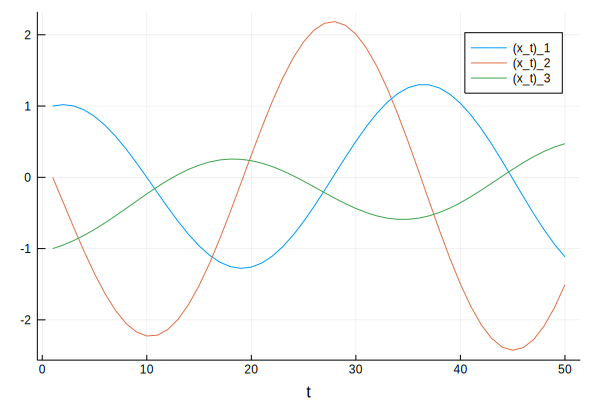

In [6]:
plot(1:T, state_traj', xlabel = "t",
     label = ["(x_t)_1", "(x_t)_2", "(x_t)_3"])

![図9.1](fig9-1.pdf)

図9.1 線形動的システムのシミュレーション



## 9.2 人口モデル

人口モデルの遷移行列を，Juliaなら簡単に1行で作れる．以下のコードは，本書9.2節のデータを用いて，2020年のアメリカの人口分布を予測する．データは`VMLS`パッケージの関数`population_data`で得られる．結果を図9.2に示す．

In [8]:
using VMLS

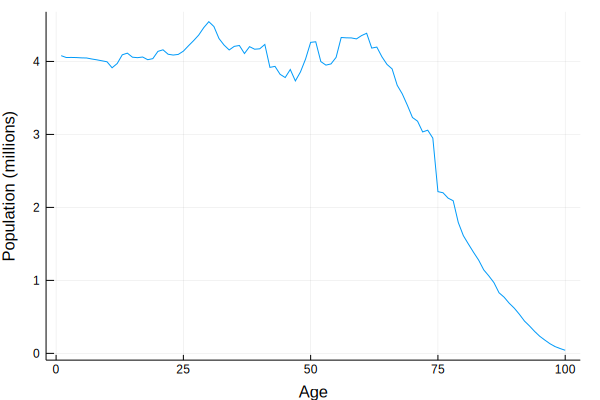

In [9]:
# 人口，出生率，死亡率の3つの100次元ベクトルを読み込む
D = population_data();
b = D["birth_rate"];
d = D["death_rate"];
A = [b'; diagonal(1 .- d[1:end-1]) zeros(length(d)-1)];
x = D["population"];
for k = 1:10
    global x
    x = A * x; 
end;
plot(x, legend=false, xlabel = "Age",
       ylabel = "Population (millions)")

![図9.2](fig9-2.pdf)

図9.2 2020年のアメリカの人口分布の予測

forループ中の`global`キーワードに注目しよう．この文がなければ，代入文`x = A * x`で作成される変数`x`のスコープはforループの中だけのローカル変数になる．つまりループの外はスコープ外であり，ループの外の`x`とは別物である．


## 9.3 感染症モデル

本書9.3節の感染症モデルのシミュレーションを実装しよう．結果を図9.3に示す．


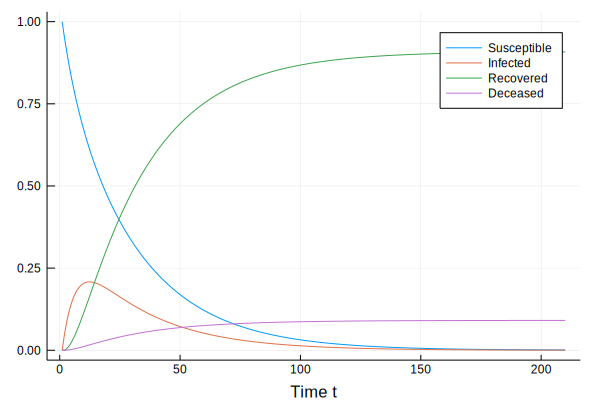

In [10]:
T = 210;
A = [ 0.95 0.04 0 0 ; 0.05 0.85 0 0 ;
      0    0.10 1 0 ; 0    0.01 0 1 ];
x_1 = [1, 0, 0, 0];
state_traj = [x_1 zeros(4, T - 1) ];  # 状態軌跡
for t=1:T-1  # 再帰計算
    state_traj[:, t+1] = A * state_traj[:, t];
end

plot(1:T, state_traj', xlabel = "Time t",
     label = ["Susceptible", "Infected", "Recovered", "Deceased"])

![図9.3](fig9-3.pdf)

図9.3 epidemic dynamicsのシミュレーション



## 9.4 物体の運動

本書9.4節の，物体の運動の離散モデルをシミュレートしよう．結果を図9.4に示す．


In [ ]:
h = 0.01; 
m = 1; 
eta = 1;
A = [ 1 h ; 0 1-h*eta/m ];
B = [ 0 ; h / m ];
x1 = [0, 0];
K = 600;  # K*h = 6秒分のシミュレーション
f = zeros(K); 
f[50:99] .= 1.0; 
f[100:139] .= -1.3;
X = [x1 zeros(2, K-1)];
for k=1:K-1
     X[:, k+1] = A * X[:, k] + B * f[k]
end

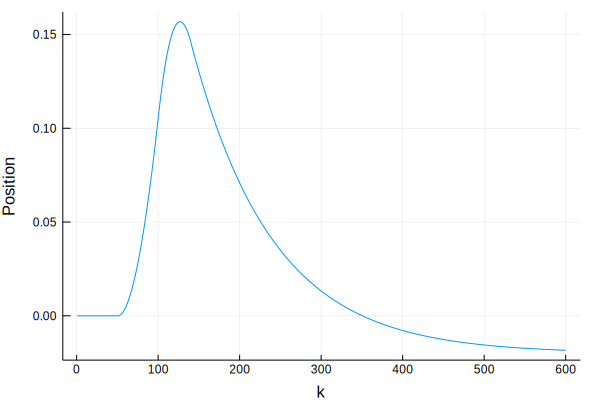

In [12]:
plot(X[1, :], xlabel="k", ylabel="Position", legend=false )

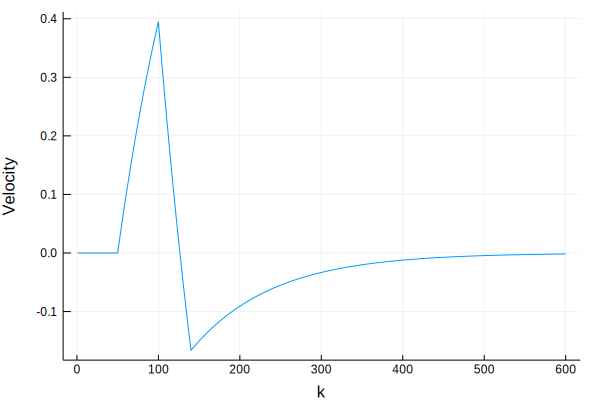

In [13]:
plot(X[2, :], xlabel="k", ylabel="Velocity", legend=false )

![図9.4（上）](fig9-4-1.pdf)
![図9.4（下）](fig9-4-2.pdf)

図9.4 直線運動する質点のシミュレーション．（上）位置，（下）速度．




### サプライチェーンのダイナミクス

